# IMPORTING MODULES

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

KNN = KNeighborsClassifier(1) # approx val - choosing point from collection



#  READING THE CSV FILE 


In [2]:
df = pd.read_csv('PROJECT1_CSV.csv')
# df is dataframe from pandas 

df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012


In [18]:
print(df.info())
# to find outlayers  extreme points 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  patents               2200 non-null   int64  
 11  score                 2200 non-null   float64
 12  year                  2200 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 223.6+ KB
None


# LABEL ENCODING 

In [19]:
label_encode = {"country":{"USA":1,"China":2,"Japan":3,"United Kingdom":4,"Germany":5,"France":6,"Italy":7,"Spain":8,"Canada":9,"South Korea":10,"Australia":11,"Taiwan":12,"India":13,"Netherlands":14,
"Switzerland":15,             
"Austria":16,                  
"Sweden": 17 ,                 
"Israel": 18 ,                 
"Finland":19,                 
"Turkey": 20 ,                 
"Belgium": 21 ,                
"Poland" : 22,                 
"Iran": 23 ,                  
"Ireland" :24 ,             
"Portugal" : 25 ,              
"Greece" : 26,                 
"New Zealand":27 ,             
"Denmark" :28 ,                
"Norway": 29  ,                
"Hong Kong":30 ,              
"Hungary":31   ,               
"South Africa" :32,           
"Czech Republic":33,          
"Russia" :34,                   
"Saudi Arabia" :35,             
"Chile":36,                  
"Egypt":37,                    
"Argentina":38,                 
"Malaysia":39,                  
"Thailand":40 ,                
"Singapore":41,                
"Colombia": 42,                 
"Slovenia" :43,                 
"Mexico":44,                   
"Romania":45,                  
"Iceland"  :46,                 
"United Arab Emirates":47,      
"Puerto Rico":48,               
"Cyprus":49,                    
"Estonia": 50,                 
"Lithuania" :51,              
"Uruguay" : 52,               
"Bulgaria": 53,                
"Croatia": 54,                  
"Serbia": 55,                  
"Uganda": 56,
"Brazil":57,
"Lebanon":58,
"Slovak Republic":59}}


df.replace(label_encode,inplace=True)





In [20]:
print("TO CHECK WHETHER THE DATA POINTS IN EACH CLASS HAS CHANGED TO NUMBERS: ")
print(df['country'].value_counts())


TO CHECK WHETHER THE DATA POINTS IN EACH CLASS HAS CHANGED TO NUMBERS: 
1     573
2     167
3     159
4     144
5     115
6     109
7      96
8      81
9      72
10     72
11     58
12     46
57     36
13     31
14     29
15     26
17     24
16     24
18     22
19     20
20     20
21     20
22     18
23     16
24     16
25     14
26     14
31     12
29     12
27     12
30     12
28     12
33     10
32     10
34      9
35      8
36      8
37      8
38      7
39      6
40      6
41      5
42      4
44      4
43      4
45      3
49      2
47      2
51      2
53      2
55      2
58      2
56      2
46      2
48      2
50      2
52      2
54      2
59      2
Name: country, dtype: int64


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   int64  
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  patents               2200 non-null   int64  
 11  score                 2200 non-null   float64
 12  year                  2200 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 223.6+ KB
None


# GIVING X AND Y VALUES FOR TRAINING MODEL

In [3]:
x_values = df[['national_rank','quality_of_education','alumni_employment','quality_of_faculty','influence','year']]
y_values = df['score']*100
y_values = y_values.apply(np.ceil) #normalizing values to eliminate decimals 

#SEPARATING DATA FOR TRAINING AND TESTING 

x_train, x_test, y_train,y_test = train_test_split(x_values,y_values,random_state = 5,test_size = 0.20)
#x and y train splits the x and y vals for training and testing
# 0.2 of tadata size for testing 
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012


In [24]:
print(x_train.shape)   #0.8 % of the data 
print(y_train.shape)
print(x_test.shape)  # 0.2 % of data  
print(y_test.shape)

(1760, 6)
(1760,)
(440, 6)
(440,)


In [5]:
print(y_values)

0       10000.0
1        9167.0
2        8950.0
3        8617.0
4        8521.0
         ...   
2195     4403.0
2196     4403.0
2197     4403.0
2198     4402.0
2199     4402.0
Name: score, Length: 2200, dtype: float64


In [6]:
print(y_train)

621     4544.0
2098    4413.0
1229    6114.0
1418    4705.0
1880    4438.0
         ...  
740     4498.0
1032    4447.0
2121    4412.0
1424    4700.0
1725    4470.0
Name: score, Length: 1760, dtype: float64


## MODEL TRAINING


In [25]:

KNN = KNN.fit(x_train,y_train) 



# DEPLOYMENT 


In [26]:
university_name = input("enter name of university to predict score: ")
national_rank = int(input("enter national rank: "))
quality_of_education = int(input("enter the quality of education(numeric): "))
alumni_employment = int(input("enter the alumni employment value(numeric): "))
quality_of_faculty = int(input("enter the quality of faculty value(numeric): "))
influence = int(input("enter the influence rate: "))
year = int(input("enter the year of survey: "))
z=[[national_rank,quality_of_education,alumni_employment,quality_of_faculty,influence,year]]
q= KNN.predict(z)
print("the score is: ")
print(q/100)

enter name of university to predict score: princeton
enter national rank: 5
enter the quality of education(numeric): 8
enter the alumni employment value(numeric): 14
enter the quality of faculty value(numeric): 2
enter the influence rate: 33
enter the year of survey: 2012
the score is: 
[82.5]


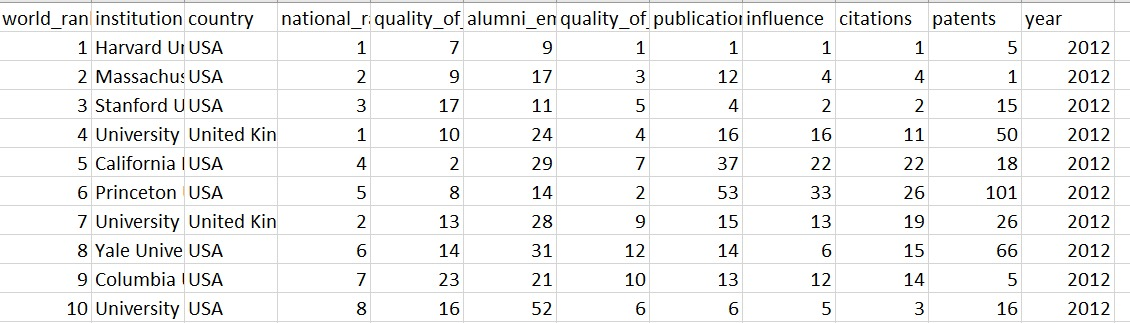